In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('images/sachin.jpg')

In [3]:
# define the averaging kernal
kernal = np.ones([13,13]) * 1/169

In [4]:
kernal

array([[0.00591716, 0.00591716, 0.00591716, 0.00591716, 0.00591716,
        0.00591716, 0.00591716, 0.00591716, 0.00591716, 0.00591716,
        0.00591716, 0.00591716, 0.00591716],
       [0.00591716, 0.00591716, 0.00591716, 0.00591716, 0.00591716,
        0.00591716, 0.00591716, 0.00591716, 0.00591716, 0.00591716,
        0.00591716, 0.00591716, 0.00591716],
       [0.00591716, 0.00591716, 0.00591716, 0.00591716, 0.00591716,
        0.00591716, 0.00591716, 0.00591716, 0.00591716, 0.00591716,
        0.00591716, 0.00591716, 0.00591716],
       [0.00591716, 0.00591716, 0.00591716, 0.00591716, 0.00591716,
        0.00591716, 0.00591716, 0.00591716, 0.00591716, 0.00591716,
        0.00591716, 0.00591716, 0.00591716],
       [0.00591716, 0.00591716, 0.00591716, 0.00591716, 0.00591716,
        0.00591716, 0.00591716, 0.00591716, 0.00591716, 0.00591716,
        0.00591716, 0.00591716, 0.00591716],
       [0.00591716, 0.00591716, 0.00591716, 0.00591716, 0.00591716,
        0.00591716, 0.00591

In [15]:
help(cv2.filter2D)

Help on built-in function filter2D:

filter2D(...)
    filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
    .   @brief Convolves an image with the kernel.
    .   
    .   The function applies an arbitrary linear filter to an image. In-place operation is supported. When
    .   the aperture is partially outside the image, the function interpolates outlier pixel values
    .   according to the specified border mode.
    .   
    .   The function does actually compute correlation, not the convolution:
    .   
    .   \f[\texttt{dst} (x,y) =  \sum _{ \substack{0\leq x' < \texttt{kernel.cols}\\{0\leq y' < \texttt{kernel.rows}}}}  \texttt{kernel} (x',y')* \texttt{src} (x+x'- \texttt{anchor.x} ,y+y'- \texttt{anchor.y} )\f]
    .   
    .   That is, the kernel is not mirrored around the anchor point. If you need a real convolution, flip
    .   the kernel using #flip and set the new anchor to `(kernel.cols - anchor.x - 1, kernel.rows -
    .   anchor.y - 1)`.
    

In [5]:
smoothened_image = cv2.filter2D(img, -1, kernal)

In [6]:
cv2.imshow('Blurred Image', smoothened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

###### Gaussian Kernal

In [15]:
kernal_size = 7
sigma = 0.35 * ((kernal_size - 1) * 0.5 - 1) + 0.9
kernal = cv2.getGaussianKernel(kernal_size, sigma)

In [16]:
kernal

array([[0.04414655],
       [0.11722289],
       [0.21061139],
       [0.25603834],
       [0.21061139],
       [0.11722289],
       [0.04414655]])

In [17]:
sigma

1.6

In [18]:
gauss_image = cv2.filter2D(img, -1, kernal)

In [19]:
cv2.imshow('Blurred Image', gauss_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
new_img = np.hstack([img, gauss_image])

In [21]:
cv2.imshow('Image', new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Median Blur

In [93]:
gray = cv2.imread('images/sachin.jpg', 0)

In [94]:
gray.shape

(1075, 850)

In [95]:
img_med = cv2.medianBlur(gray, 15)  # 5 --> kernel size

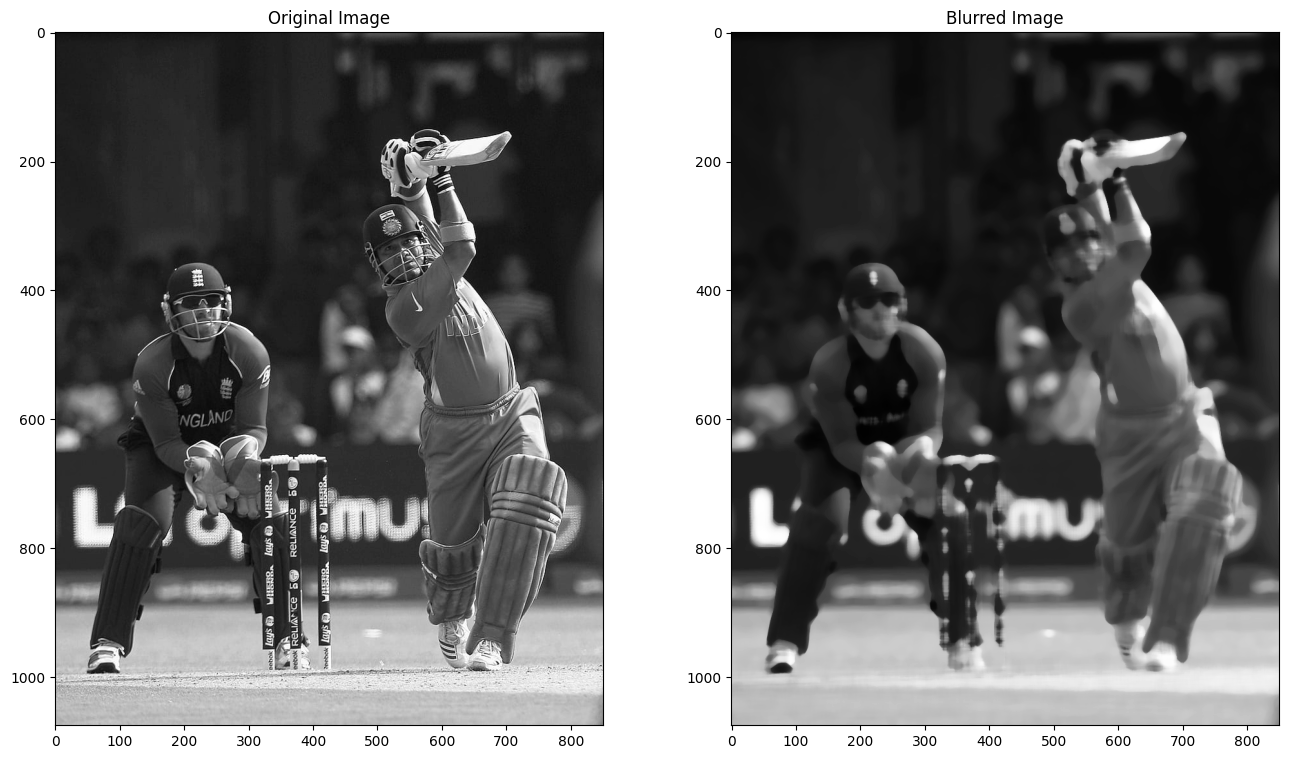

In [96]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.title('Blurred Image')
plt.imshow(img_med, cmap='gray')

In [97]:
new_gray = gray.copy()
patch = gray[500:700, 200:600]

In [98]:
blurred_patch = cv2.medianBlur(patch, 15)  

In [99]:
gray[500:700, 200:600] = blurred_patch

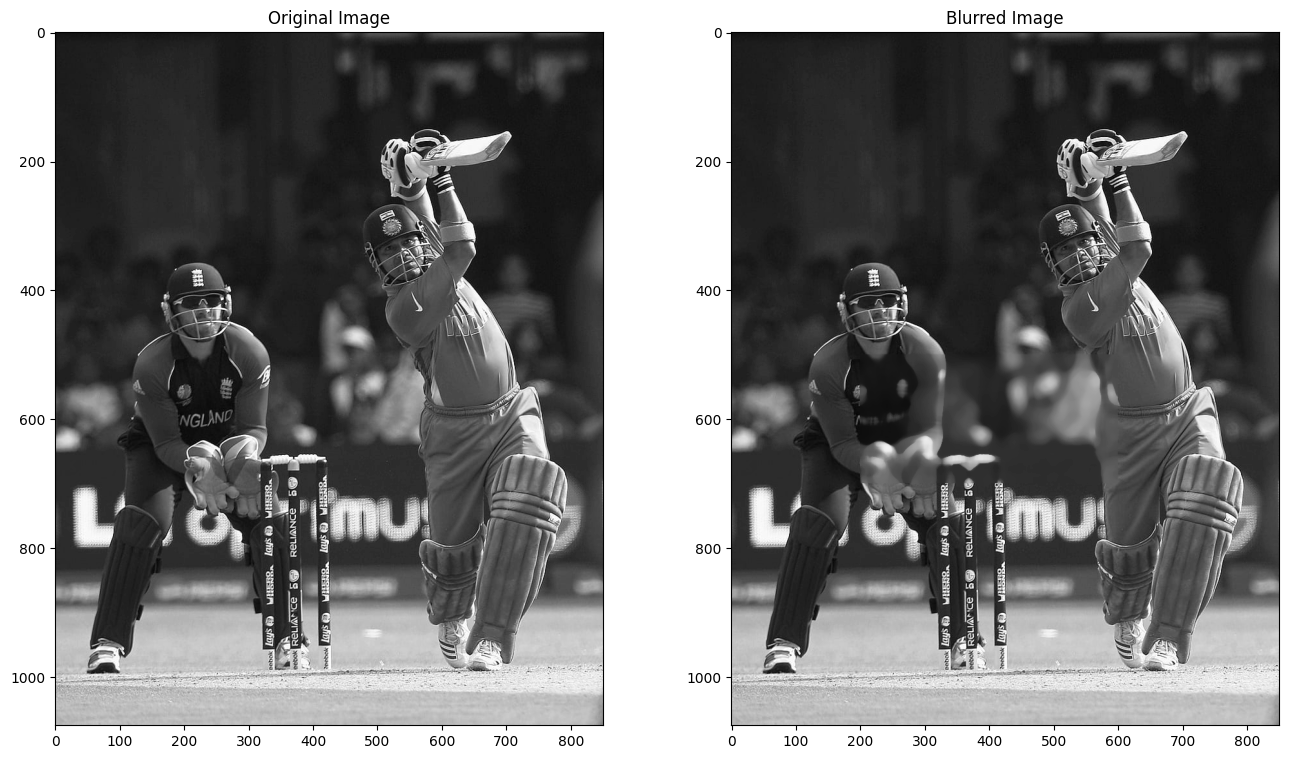

In [100]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(new_gray, cmap='gray')
plt.subplot(1,2,2)
plt.title('Blurred Image')
plt.imshow(gray, cmap='gray')